In [25]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
from uncertainties import ufloat
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit 

In [26]:
# Initialize Data
with open('data2.txt') as f:
    lines = f.readlines()
    m = np.array([float(line.split()[0])/1000 for line in lines])
    t = np.array([float(line.split()[1])/10 for line in lines])

# Errors
err_m = np.array([0.5/1000 for i in m])
err_t = np.array([0.004  for i in t])

# # Convert to unumpy array for easy error propagation
# m = unumpy.uarray(m, err_m)
# t = unumpy.uarray(t, err_t)

print("#of Data Points:",len(t))

#of Data Points: 9


[-0.013420380764283603+/-0.03408829451265021
 2.8800860429063317+/-0.007247671657078788]


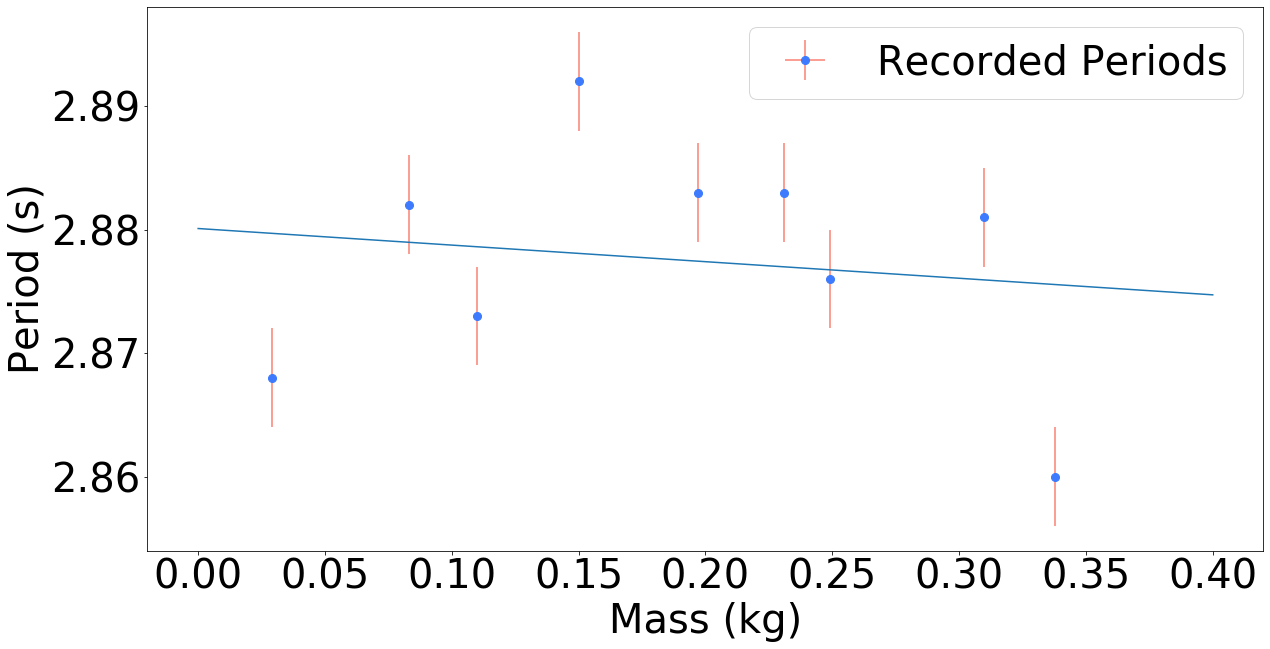

In [27]:
x_err = err_m
y_err = err_t

display_x = m
display_y = t

plt.figure(figsize=(20,10))
plt.errorbar(    display_x,
                 display_y,
            yerr=y_err,
            xerr=x_err,
                fmt='o', color="xkcd:lightish blue", ecolor="salmon", ms=8, label="Recorded Periods")

params, cov = np.polyfit(display_x, display_y, 1, cov=True, w=1/y_err)

temp_x = np.linspace(0,0.4,1000)
plt.plot(temp_x,params[0]*temp_x+params[1])

p = unumpy.uarray(params, np.sqrt(np.diag(cov)))
print(p)

plt.rcParams.update({'font.size': 40})
plt.xlabel("Mass (kg)")
plt.ylabel("Period (s)")
plt.legend(loc="upper right")
plt.savefig("Figures/mass_simple.png", dpi=300)